# DATA 1202 - Data Analysis Tools for Analytics

## Assignment #5 - Data Reproducibility

### Ibrahima Sheik Mohamed M [ID: 100781252]

*DCFall2020                     December 07, 2020*

### Problem Statement:
*Four datasets were provided. The four dataset has to be iterated over using glob(). For each of the dataset three visualization and a corresponding message has to be printed. This Assignment evaluates students’ knowledge on Python Functions, Transformations using Python , git and github.*

***User-defined Function visualize***

In [1]:
def visualize(filename):
    """ Create a sub plot of average of each features, max of each features and min of each features."""
       
    # import the content of the file to a dataframe with header as none
    data = pd.read_csv(filepath_or_buffer = filename, header = None)
    
    # create another dataframe to store the computed results of dataframe data
    # Calculations used: column-wise average, column-wise maximum and column-wise minimum
    datacal = pd.DataFrame(data.mean(axis = 0), columns = ['Average'])
    datacal['Maximum'] = pd.DataFrame(data.max(axis = 0))
    datacal['Minimum'] = pd.DataFrame(data.min(axis = 0))
    
    # set the subplot size as rows = 1 and columns = 3 and the figure size to 1200 x 300
    fig, ax = plt.subplots(1, 3, figsize = (12, 3))
    
    # adjust the width space between the subplots for the visualizations to look good
    plt.subplots_adjust(wspace = 0.4)
    
    # get the dataframe column index for x values
    x = np.arange(0, len(datacal.index))
    
    n = len(datacal.columns)     # provides the number of colums (3 columns) in dataframe datacal
    
    col_names = datacal.columns.values.tolist()
    # col_names list contains the column names of datacal to be used for ylabel
    
    colors = ["orange", "green", "red"]     # list for colors to be used in graph
    
    
    # create line chart with subplots for each for the computed results - Average, Maximum, Minimum 
    for i in range(0, n):
        ax[i].plot(x, datacal.iloc[:, i], color = colors[i])
        ax[i].set(xlabel = "Feature#", ylabel = col_names[i])
    
    plt.show()
    return datacal     # returns the computed dataframe containing Average, Maximum, Minimum values

***User-defined Function identify_issues***

In [2]:
def identify_issues(filedata):
    """ Checks the credibility of the dataset and print appropriate message. """
    
    # check whether max of feature#0 = 0 and max of feature#20 = 20
    if filedata.iloc[0, 1] == 0 and filedata.iloc[20, 1] == 20:
        print("I doubt the integrity of this dataset")
        
    # check whether sum of min of all the feature is 0
    elif sum(filedata.iloc[:, 2]) == 0:   
        print("Why is this happenning?")
        
    else:
        print("Dataset looks good")    

***Main Program***

In [3]:
# import required libraries
import glob
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = sorted(glob.glob('data*.csv'))     # glob is used for filename pattern matching within the directory

print(dataset)

['data-01.csv', 'data-02.csv', 'data-03.csv', 'data-04.csv']




data-01.csv


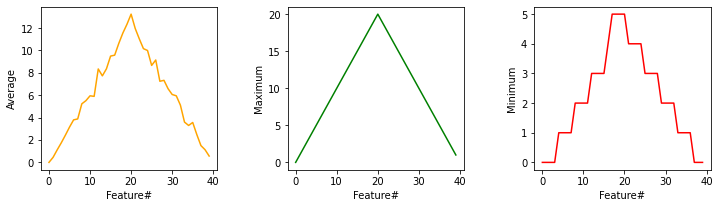

I doubt the integrity of this dataset


data-02.csv


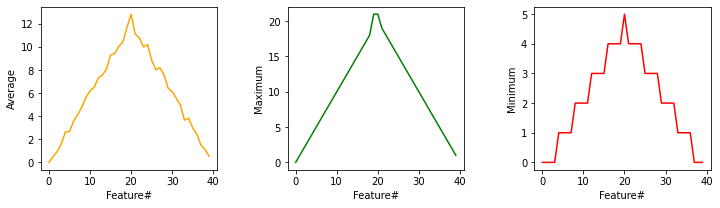

Dataset looks good


data-03.csv


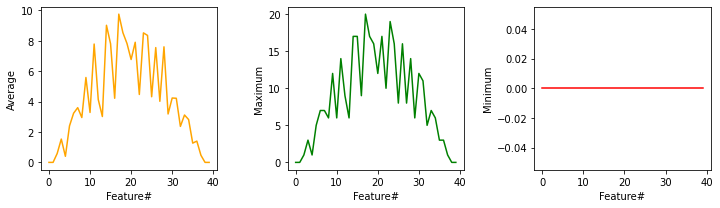

Why is this happenning?


data-04.csv


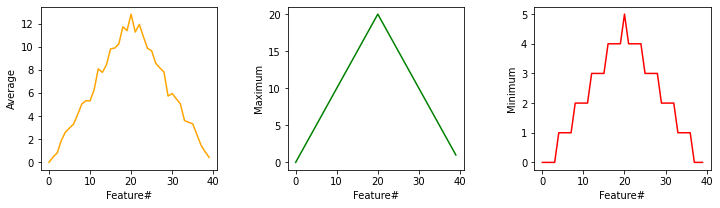

I doubt the integrity of this dataset


In [4]:
# For each dataset, print the dataset name, corresponding Line graphs and message
for datasets in dataset[:4]:
    print("\n")
    print(datasets)
    calc_data = visualize(datasets)     # calls the function visualize passing the dataset name as parameter
                                        # stores the return value (dataframe) in calc_data
    identify_issues(calc_data)          # calls the function identify_issues passing calc_data as parameter